# FIT 5149 Assessment 2 Electric Vehicle Charging: 
### author: aaa
### date:

# 七爷流弊 
# 轩桑牛逼！！！！！

## 1. Library import

In [1]:
import pandas as pd
import calplot
import seaborn as sns
import matplotlib.pyplot as plot

# from tsfresh import extract_features, extract_relevant_features, select_features
# from tsfresh.utilities.dataframe_functions import impute
# from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

from pylab import rcParams 
import statsmodels.api as sm 

import numpy as np

## 2. Loading File

In [2]:
file = pd.read_csv('./train_data_withlabels.csv')
test_file = pd.read_csv('./test_data_nolabels.csv')

## 3.Exploratroy Data Analsysis

In [14]:
# Get the raw data
traditional_file = file[['dataid', 'localminute','total_load','target']]

### 3.1 Overview of the raw dataset

In [15]:
traditional_file

,dataid,localminute,total_load,target
0,1,2018-01-02 01:00:00,0.416,0
1,2,2018-01-02 01:01:00,0.416,0
2,3,2018-01-02 01:02:00,0.416,0
3,4,2018-01-02 01:03:00,0.415,0
4,5,2018-01-02 01:04:00,0.416,0
...,...,...,...,...
419803,419804,2018-10-20 13:43:00,0.703,0
419804,419805,2018-10-20 13:44:00,0.704,0
419805,419806,2018-10-20 13:45:00,0.700,0
419806,419807,2018-10-20 13:46:00,0.678,0


In [13]:
traditional_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419808 entries, 0 to 419807
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   dataid       419808 non-null  int64   
 1   localminute  419808 non-null  object  
 2   total_load   419808 non-null  float64 
 3   target       419808 non-null  category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 10.0+ MB


In [17]:
# display the statistical information
traditional_file.describe()

,dataid,total_load,target
count,419808.000000,419808.000000,419808.000000
mean,209904.500000,1.138576,0.054411
std,121188.275241,1.551522,0.226826
min,1.000000,-4.780000,0.000000
25%,104952.750000,0.277000,0.000000
50%,209904.500000,0.414000,0.000000
75%,314856.250000,1.177000,0.000000
max,419808.000000,15.404000,1.000000


 According to the information displayed above, it could be observed that the column type of **localminute** and **total_load** should be converted to datetime and category. In addition, there are negative values in the **total_load** column, where negative values are not supposed to appear. As a result, we will make some data pre-processing measure to process the raw data.

#### 3.1.1 Data Pre-processing

**Convert column type**

In [24]:
# convert integer to category
traditional_file.target = traditional_file.target.astype('category')

E:\Anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
# convert the object to datetime 
traditional_file['localminute'] = pd.to_datetime(traditional_file['localminute'])

C:\Users\59914\AppData\Local\Temp/ipykernel_12600/2181648000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traditional_file['localminute'] = pd.to_datetime(traditional_file['localminute'])


**Remove duplicate**

In [22]:
traditional_file.drop_duplicates()

,dataid,localminute,total_load,target
0,1,2018-01-02 01:00:00,0.416,0
1,2,2018-01-02 01:01:00,0.416,0
2,3,2018-01-02 01:02:00,0.416,0
3,4,2018-01-02 01:03:00,0.415,0
4,5,2018-01-02 01:04:00,0.416,0
...,...,...,...,...
419803,419804,2018-10-20 13:43:00,0.703,0
419804,419805,2018-10-20 13:44:00,0.704,0
419805,419806,2018-10-20 13:45:00,0.700,0
419806,419807,2018-10-20 13:46:00,0.678,0


**Convert the negative values to possitive values??? why**

In [30]:
# show the 
traditional_file['total_load'] = traditional_file['total_load'].abs()
# traditional_file[traditional_file['total_load'] <= 0]

C:\Users\59914\AppData\Local\Temp/ipykernel_12600/3184972222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traditional_file['total_load'] = traditional_file['total_load'].abs()


In [32]:
traditional_file.describe()

,dataid,total_load
count,419808.000000,419808.000000
mean,209904.500000,1.168551
std,121188.275241,1.529073
min,1.000000,0.001000
25%,104952.750000,0.279000
50%,209904.500000,0.417000
75%,314856.250000,1.232000
max,419808.000000,15.404000


### 3.1.2 Analysis of univariate and bivariate

**Label Analysis**

In [41]:
# https://www.statology.org/seaborn-barplot-show-values/

# a function used to add values in the count plot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

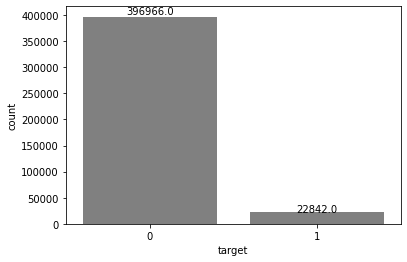

In [42]:
# Distribution of the label
p = sns.countplot(traditional_file['target'], color='gray')
show_values(p)

According to the plots displayed above, the charging time (target = 1) is **much longer than** the uncharging time(target = 0). ??补充？

**Total_Load Analysis**

<AxesSubplot:ylabel='Density'>

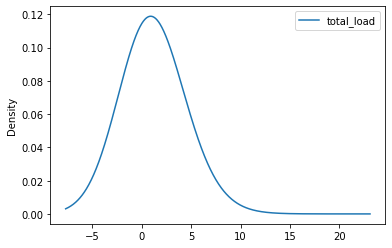

In [46]:
traditional_file[['total_load']].plot.kde(bw_method=2)#? 是否有别的选择

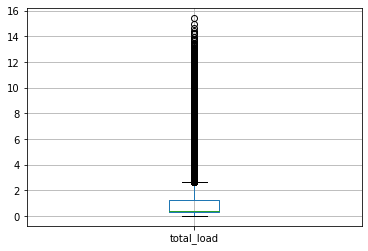

In [52]:
boxplot = traditional_file.boxplot(column=['total_load'])  

In [53]:
traditional_file[['total_load']].describe()

,total_load
count,419808.000000
mean,1.168551
std,1.529073
min,0.001000
25%,0.279000
50%,0.417000
75%,1.232000
max,15.404000


From the plot and table above, it could be observed that most of the values are distributed around the zero. In addition, from the boxplot, most of the values are between 0 and 2, **while the others are well beyond Q3 + 1.5IQR a lot**. In this case, we would like to look how many values exceeds the threshold, which will be illustrated as follow.

In [58]:
# get the number of values beyong Q3 + 1.5IQR
total_load_Q1 = traditional_file['total_load'].quantile(0.25)
total_load_Q3 = traditional_file['total_load'].quantile(0.75)
total_load_IQR = total_load_Q3 - total_load_Q1

# Get the dataframe that save the "outliers"
outliers_df = traditional_file.query('(@total_load_Q3 + 1.5 * @total_load_IQR) <= total_load ')

In [61]:
outliers_df

,dataid,localminute,total_load,target
1637,1638,2018-01-03 04:17:00,2.841,0
3999,4000,2018-01-04 19:39:00,4.606,0
4000,4001,2018-01-04 19:40:00,4.554,0
4001,4002,2018-01-04 19:41:00,4.562,0
4002,4003,2018-01-04 19:42:00,5.176,0
...,...,...,...,...
419788,419789,2018-10-20 13:28:00,3.007,0
419789,419790,2018-10-20 13:29:00,3.206,0
419792,419793,2018-10-20 13:32:00,5.094,0
419795,419796,2018-10-20 13:35:00,4.441,0


It could be observed that there are 83813 rows whose total_load exceeds the **Q3+1.5IQR**. Subsequently, we would like to know the distribution of target in this dataset in order to judge whether there is an relation between these two variables.

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


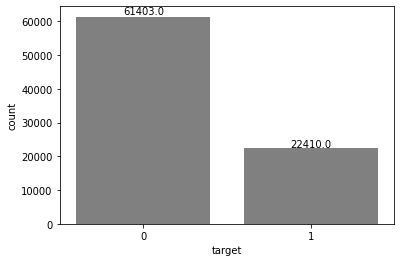

In [62]:
# Distribution of the label
p1 = sns.countplot(outliers_df['target'], color='gray')
show_values(p1)

From the target distribution in the raw data, there are total **22842** charging minutes. As a comparison, there are total **22410** charging minuts when the total load is beyond Q3+1.5IQR.In this case, we could assume there may have a **strong relation** between total_load and target label.

From the analysis illustrated above, we analyze the univariate varible and make some asssumption. After that, we will study the relationship between two or more varibles.

**Relationship between localminute and total_load**

From this plot, 

In [63]:
tenp = traditional_file[['localminute','total_load']].groupby(pd.Grouper(key='localminute',freq="D")).mean()
dict1 = {}
j = 0
for i in tenp.index:
    dict1.update({i:float(tenp.values[j])})
    j+=1

new_temp = pd.DataFrame(list(dict1.items()),columns = ['localminute','total_load'])
groups = new_temp.groupby(pd.Grouper(key='localminute',freq="M"))
pd.Grouper
dict2 = {}
months = pd.DataFrame()
array = []
for name, group in groups:
    #years[name.month] = group
    for i in group.values.tolist():
        array.append(round(i[1],2))
    if len(array) <31:
        for i in range(31-len(array)):
            array.append(0.00)
    months[name.month] = array
    array = []

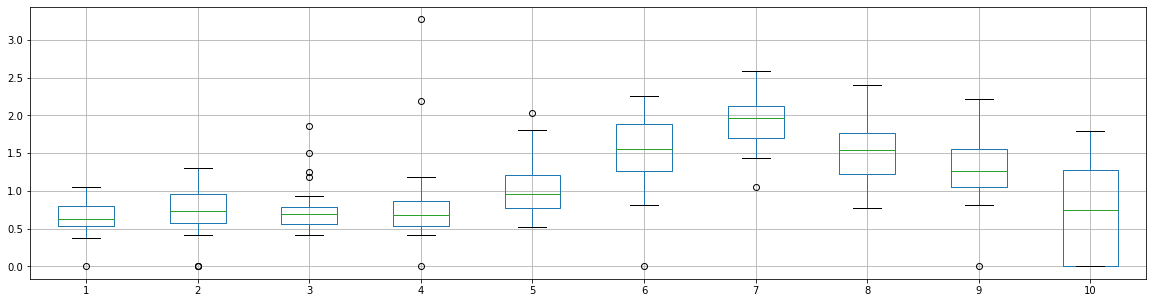

In [64]:
fig, ax = plot.subplots(1,1, figsize =(20,5))
ax = months.boxplot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

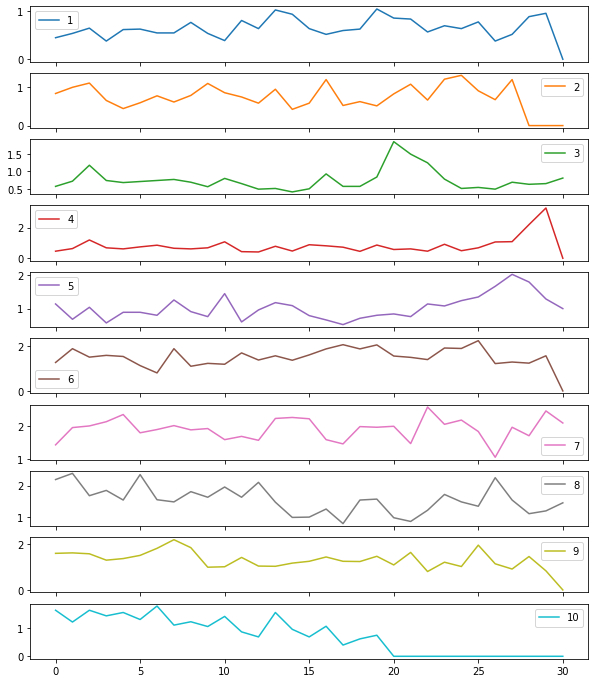

In [65]:
months.plot(subplots=True, legend=True, figsize=(10,12))

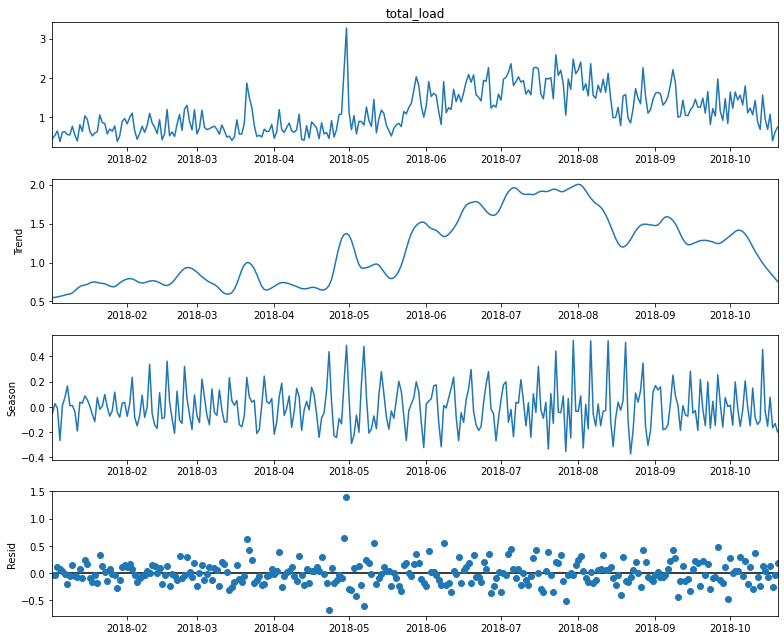

In [66]:
# https://towardsdatascience.com/different-types-of-time-series-decomposition-396c09f92693
# https://zhuanlan.zhihu.com/p/302325061 分解图
# https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930
from statsmodels.tsa.seasonal import STL
rcParams['figure.figsize'] = 11, 9 
res = STL(tenp['total_load']).fit()
res.plot()
plot.show()

In [ ]:
####????解释

## 1.3 visualizing the relationship between week and month

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

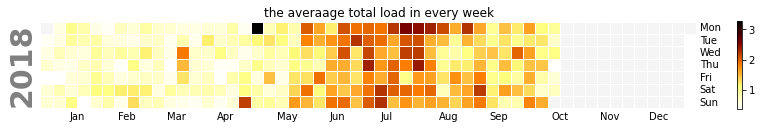

In [67]:
calplot.calplot(tenp['total_load'], edgecolor=None, cmap = 'afmhot_r',suptitle = 'the averaage total load in every week')

# 2. feature selection

## 2.1 add feature from the part 1

In [ ]:
traditional_file['month'] = traditional_file['localminute'].map(lambda x:x.month)
# sunday is 0 
# traditional_file['week'] = traditional_file['localminute'].map(lambda x:x.dayofweek)
traditional_file['day'] = traditional_file['localminute'].map(lambda x:x.day)
traditional_file['hour'] = traditional_file['localminute'].map(lambda x:x.hour)
# del traditional_file['week']

In [ ]:
# 分为白天黑夜

traditional_file['midnight'] = traditional_file['localminute'].dt.hour.isin(range(1,7)).astype(int)

In [ ]:
fig, ax = plot.subplots(1,1, figsize =(20,5))
ax = sns.violinplot(x="hour", y="total_load", data=traditional_file)
ax.set_title('the boxplot total_load for each month in 24 hours')

## 2.2 using tsfresh to extract additional features

In [ ]:
# file.index = np.arange(1, len(file)+1)
# target = file['target']
# other = file.drop('target', axis= 1 )

In [ ]:
# features_filtered_direct = extract_relevant_features(other, target,
#                                                      column_id='dataid' column_sort='localminute',column_value = 'total_load')

## 2.3 more research in a

In [ ]:
Radar_file = traditional_file[['total_load','month','hour']].groupby(['month', 'hour']).mean()
Radar_name = list(set(traditional_file.hour))
Radar_name[0] = 24

angles=np.linspace(0,2*np.pi,len(Radar_name), endpoint=False)

fig=plot.figure(figsize=(13,13))
ax=fig.add_subplot(111, polar=True)
ax.set_title('the average total_load for each month in 24 hours')
for i in range(10):
    ax.plot(angles,Radar_file.total_load[i+1].values, 'o-', linewidth=2, label=i+1)
    ax.fill(angles, Radar_file.total_load[i+1].values, alpha=0.05)
ax.set_thetagrids(angles * 180/np.pi, Radar_name)
plot.grid(True)
plot.tight_layout()
plot.legend()
plot.show()

In [ ]:
# sang ?
# survery the average time to charge
traditional_file

In [ ]:
traditional_file

In [ ]:
# use to calcualte the average charge time and corresponding total_load time
from statistics import mean
def calculate_avg_load_charge(original_df):
    # save the charge time
    charge_time = []
    # save the corresponding total load values
    total_load_values = []
    # save the date informatin of current 
    flag = False
    # record the charge time of every time
    each_charge_time = 0
    each_total_load = []
    for index, row in original_df.iterrows():
        current_charge_time = row['target']
        if current_charge_time == 1 and flag is False:
            flag = True
        if flag is True and current_charge_time == 1:
            
            each_charge_time = each_charge_time + 1
            each_total_load.append(row['total_load']) 
        if current_charge_time == 0 and flag is True:
            
            flag = False
            charge_time.append(each_charge_time)
            total_load_values.append(mean(each_total_load))
            each_charge_time = 0
            each_total_load = []

    # return the result
    result = pd.DataFrame({'total_load': total_load_values, 'charge_time': charge_time})
    return result

In [ ]:
new_df

In [ ]:
new_df = calculate_avg_load_charge(traditional_file)

In [ ]:
new_df.describe()

According to the result shown above, it could be observed that the average charging time is 54.1 minutes. Also, it could be observed that the average total load when the EV is being charging is about 4.82, and **1/4 quantile** is about **4.15**. In this case, we would like to create a new column which is used to judge whether current total_load values is exceed the 1/4 quantile.

???添加is_高耗电量？？？？？中位数还是均值

In [ ]:
traditional_file['high_load'] = traditional_file.total_load.apply(lambda x: 1 if x>4.15 else 0)

In [ ]:
traditional_file

## 3. trainning model

In [ ]:
file['month'] = traditional_file['localminute'].map(lambda x:x.month)
# sunday is 0 
# traditional_file['week'] = traditional_file['localminute'].map(lambda x:x.dayofweek)
file['day'] = traditional_file['localminute'].map(lambda x:x.day)
file['hour'] = traditional_file['localminute'].map(lambda x:x.hour)

In [ ]:
file['midnight'] = traditional_file['localminute'].dt.hour.isin(range(1,7)).astype(int)

In [ ]:
train_data,test_data = train_test_split(file,train_size=0.8,shuffle=False)

train_label = train_data['target']
train_data = train_data.drop(['dataid','localminute','target'],axis=1)

test_label = test_data['target']
test_data = test_data.drop(['dataid','localminute','target'],axis=1)

In [ ]:
f1 = {}
precision = {}

### 3.1 KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(train_data,train_label)
knn_prediction = knn.predict(test_data)
f1['knn'] = f1_score(test_label,knn_prediction)
precision['knn'] = precision_score(test_label,knn_prediction)

### 3.2 logestic

In [ ]:
lm = LogisticRegression()

lm.fit(train_data,train_label)
lm_prediction = lm.predict(test_data)
f1['lm'] = f1_score(test_label,lm_prediction)
precision['lm'] = precision_score(test_label,lm_prediction)

### 3.3 lgbm 

In [ ]:
lgbm = LGBMClassifier(num_leaves=31,n_estimators=1500,learning_rate=0.01)

lgbm.fit(train_data,train_label,eval_set=(test_data,test_label),verbose=50)
lgbm_prediction = lgbm.predict(test_data,num_iteration=lgbm.best_iteration_)
f1['lgbm'] = f1_score(test_label,lgbm_prediction)
precision['lgbm'] = precision_score(test_label,lgbm_prediction)

### 3.4 XGboost

In [ ]:
xgb = XGBClassifier()

xgb.fit(train_data,train_label)
xgb_prediction = xgb.predict(test_data)
f1['xgb'] = f1_score(test_label,xgb_prediction)
precision['xgb'] = precision_score(test_label,xgb_prediction)

### 3.5 MLP

In [ ]:
train_data

In [ ]:
from keras.layers.core import Dense, Dropout
from keras.optimizers import RMSprop
from keras.models import Sequential

model = Sequential()
model.add(Dense(units = 128, input_dim=11, activation='relu'))
model.add(Dropout(0.2))    
model.add(Dense(units = 64,  input_dim=11, activation='relu'))    
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'linear'))
model.summary()
model.compile(loss='mean_squared_error', optimizer=RMSprop(lr = 0.01))

model.fit(train_data.values,train_label.values, epochs=100, batch_size=50, verbose=50)

mlp_prediction = model.predict(test_data)

ttt = []
for i in mlp_prediction:
    if i>=0.5:
        ttt.append(1)
    else:
        ttt.append(0)

f1['mlp'] = f1_score(test_label,np.array(ttt))
precision['mlp'] = precision_score(test_label,np.array(ttt))

In [ ]:
f1

In [ ]:
precision